In [1]:
import pandas as pd

# Step 1: Read the 'breast_cancer.csv' dataset into a DataFrame
df = pd.read_csv('spam_dataset.csv')

# Step 2: Create the data profile table
data_profile = []

for column in df.columns:
    unique_count = df[column].nunique()
    data_type = df[column].dtype
    
    if df[column].dtype in [int, float]:
        min_val = df[column].min()
        max_val = df[column].max()
    else:
        min_val, max_val = None, None
    
    data_profile.append({
        'Column Name': column,
        'Data Type': data_type,
        'Unique Value Count': unique_count,
        'Min': min_val,
        'Max': max_val
    })

# Convert the list of dictionaries to a DataFrame
data_profile = pd.DataFrame(data_profile)

# Step 3: Display the data profile table
print("Data Profile Table:")
print(data_profile)


Data Profile Table:
  Column Name Data Type  Unique Value Count   Min   Max
0       word1     int64                   2  None  None
1       word2     int64                   2  None  None
2       word3     int64                   2  None  None
3       word4     int64                   2  None  None
4        spam     int64                   2  None  None


### 1b: write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the spam_dataset.csv to test it out. 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("spam_dataset.csv")

# Split the data into features (X) and the target (y)
X = df[['word1', 'word2', 'word3', 'word4']]
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracy for both classifiers
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("Naive Bayes Classifier Accuracy: {:.2f}%".format(nb_accuracy * 100))
print("K-Nearest Neighbors Classifier Accuracy: {:.2f}%".format(knn_accuracy * 100))


Naive Bayes Classifier Accuracy: 40.00%
K-Nearest Neighbors Classifier Accuracy: 30.00%


###  2.b: Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the spam_dataset.csv, ask to output an ROC curve and AUC score. (Hint: if you fit a decision tree, you might want to reduce max_depth) 

### High depth Value

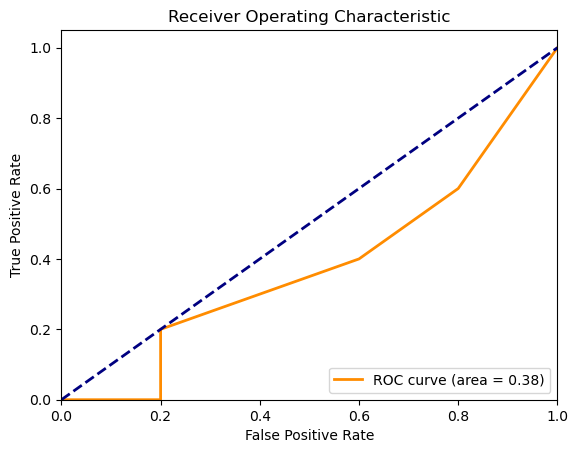

AUC Score: 0.38


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spam_dataset.csv")

# Split the data into features (X) and the target (y)
X = df[['word1', 'word2', 'word3', 'word4']]
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the classifier (Decision Tree) with reduced max_depth
classifier = DecisionTreeClassifier(max_depth=6)  # You can adjust max_depth as needed
classifier.fit(X_train, y_train)

# Predict probabilities for class 1 (spam) on the test data
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print("AUC Score: {:.2f}".format(roc_auc))


### Lowered Depth Value

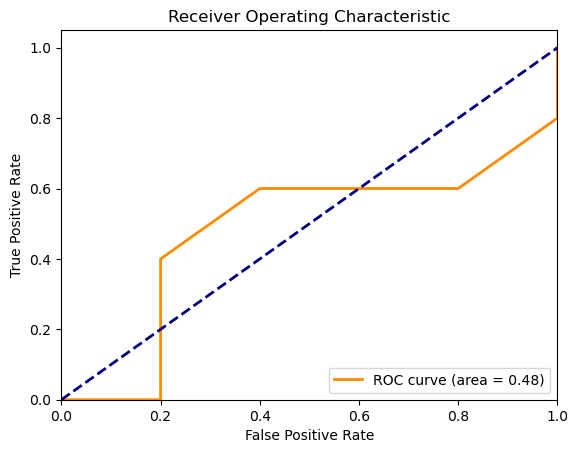

AUC Score: 0.48


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("spam_dataset.csv")

# Split the data into features (X) and the target (y)
X = df[['word1', 'word2', 'word3', 'word4']]
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the classifier (Decision Tree) with reduced max_depth
classifier = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed
classifier.fit(X_train, y_train)

# Predict probabilities for class 1 (spam) on the test data
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print("AUC Score: {:.2f}".format(roc_auc))
